**Practical no. 8**

**K-Means Clustering**

**a) Apply the K-Means algorithm to group similar data points into clusters.**

**b) Determine the optimal number of clusters using elbow method or silhouette analysis.**

**c) Visualize the clustering results and analyze the cluster characteristics.**

**T114 | Bhumika Shelar**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [23]:
df = pd.read_csv("/content/synthetic_disaster_events_2025.csv")
print(df.shape)
print(df.columns)
df.head()


(20000, 13)
Index(['event_id', 'disaster_type', 'location', 'latitude', 'longitude',
       'date', 'severity_level', 'affected_population',
       'estimated_economic_loss_usd', 'response_time_hours', 'aid_provided',
       'infrastructure_damage_index', 'is_major_disaster'],
      dtype='object')


,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1


In [25]:
# Convert disaster_type to numerical
df['disaster_type'] = df['disaster_type'].astype('category').cat.codes

# Use full dataset except event_id
X = df.drop('event_id', axis=1)

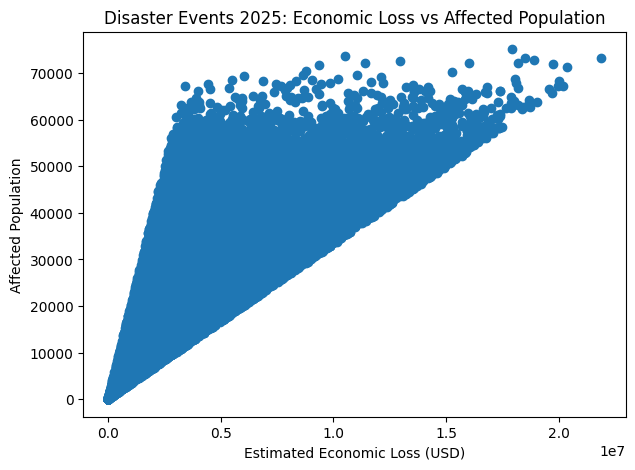

In [27]:
plt.figure(figsize=(7,5))
plt.scatter(X['estimated_economic_loss_usd'], X['affected_population'])
plt.xlabel('Estimated Economic Loss (USD)')
plt.ylabel('Affected Population')
plt.title('Disaster Events 2025: Economic Loss vs Affected Population')
plt.show()

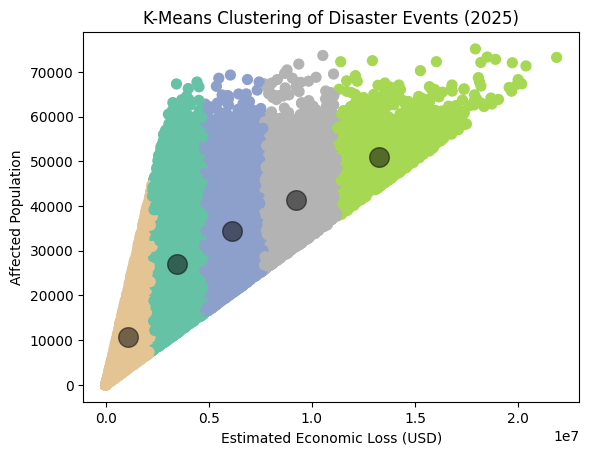

In [30]:
x = X[['estimated_economic_loss_usd', 'affected_population']].dropna()

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

# Scatter plotting the result
plt.scatter(
    x['estimated_economic_loss_usd'],
    x['affected_population'],
    c=y_kmeans,
    s=50,
    cmap='Set2'
)

# Centroids
centers = kmeans.cluster_centers_
loss_idx = x.columns.get_loc('estimated_economic_loss_usd')
pop_idx = x.columns.get_loc('affected_population')
plt.scatter(
    centers[:, loss_idx],
    centers[:, pop_idx],
    c='black',
    s=200,
    alpha=0.5)
plt.xlabel('Estimated Economic Loss (USD)')
plt.ylabel('Affected Population')
plt.title('K-Means Clustering of Disaster Events (2025)')
plt.show()

In [31]:
#Elbow method
sum = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    sum.append(kmeans.inertia_)

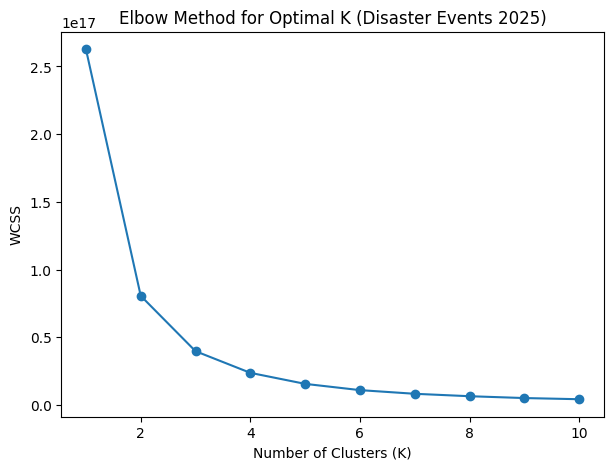

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plot Elbow Graph
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K (Disaster Events 2025)')
plt.show()

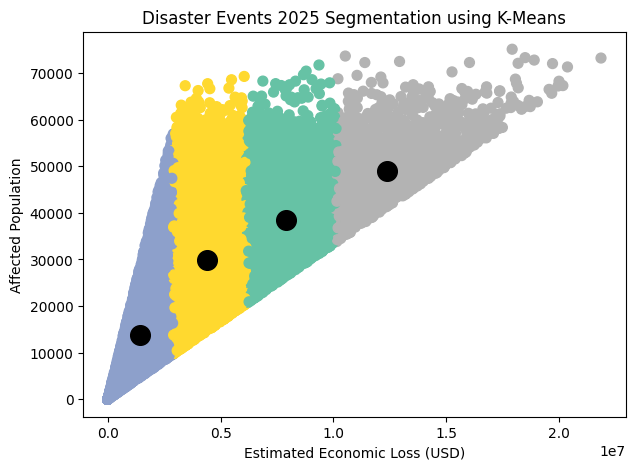

In [33]:
X = x[['estimated_economic_loss_usd', 'affected_population']]

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='Set2', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

plt.xlabel('Estimated Economic Loss (USD)')
plt.ylabel('Affected Population')
plt.title('Disaster Events 2025 Segmentation using K-Means')
plt.show()

In [34]:
p1 = X.iloc[0].values
p2 = X.iloc[1].values
euclidean_distance = np.sqrt(np.sum((p1 - p2) ** 2))
print("Euclidean Distance between first two points:", euclidean_distance)

Euclidean Distance between first two points: 3228013.9619830814


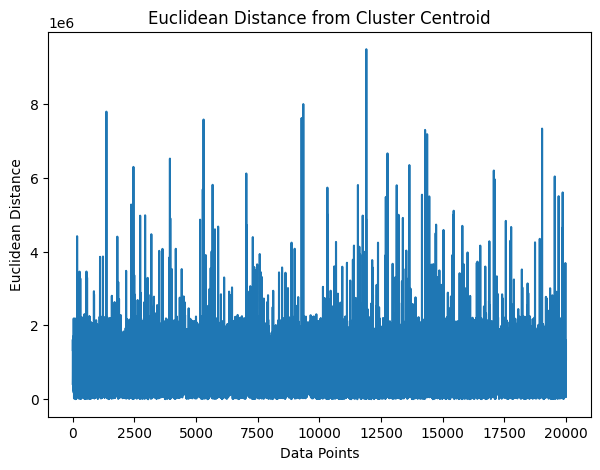

In [35]:
euclidean_distances = []

for i in range(len(X)):
    centroid = centers[y_kmeans[i]]
    distance = np.linalg.norm(X.iloc[i].values - centroid)
    euclidean_distances.append(distance)

plt.figure(figsize=(7,5))
plt.plot(euclidean_distances)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance from Cluster Centroid')
plt.show()

In [36]:
from scipy.spatial.distance import cdist
clusters = np.unique(y_kmeans)
intra_distances = []
for cluster in clusters:
    cluster_points = X.values[y_kmeans == cluster]
    if len(cluster_points) > 1:
        distances = cdist(cluster_points, cluster_points, metric='euclidean')
        intra_distances.append(distances.max())
    else:
        intra_distances.append(0)
max_intra = np.max(intra_distances)
min_inter = np.inf
for i in range(len(clusters)):
    for j in range(i + 1, len(clusters)):
        points_i = X.values[y_kmeans == clusters[i]]
        points_j = X.values[y_kmeans == clusters[j]]
        distances = cdist(points_i, points_j, metric='euclidean')
        min_inter = min(min_inter, distances.min())
dunn_index = min_inter / max_intra
print("Dunn Index:", dunn_index)

Dunn Index: 0.0001298192250868077
